Кадерова Надия

In [1]:
import numpy as np
import pandas as pd
import statistics
import random
import csv

In [2]:
data = pd.read_csv('/Users/renat/Desktop/TechPrac/weight-height.csv')
data

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

Анализ нормальности распределения

In [3]:
dh = data['Height']
dw = data['Weight']
dh = dh.to_numpy()
dw = dw.to_numpy()

In [4]:
from scipy.stats import shapiro
shapiro(dh)

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960617423057556, pvalue=8.136066448754815e-16)

p-value ≤ 0.05 => отвергаем нулевую гипотезу, что распределение не является нормальным => Height распределен нормально

In [5]:
shapiro(dw)

ShapiroResult(statistic=0.9862451553344727, pvalue=5.5324876720321126e-30)

p-value ≤ 0.05 => отвергаем нулевую гипотезу, что распределение не является нормальным => Weight распределен нормально

Графический метод сравнения с нормальным распределением

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

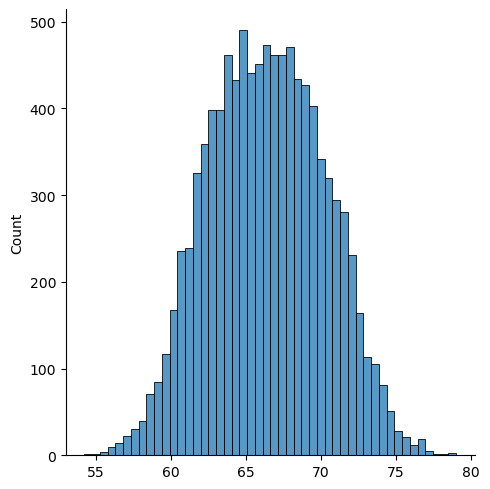

In [8]:
sns.displot(dh)

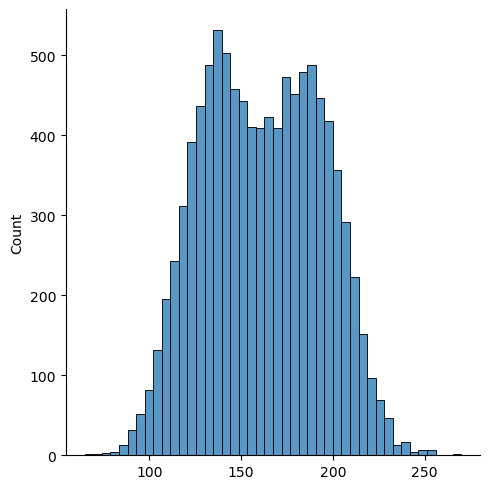

In [9]:
sns.displot(dw)

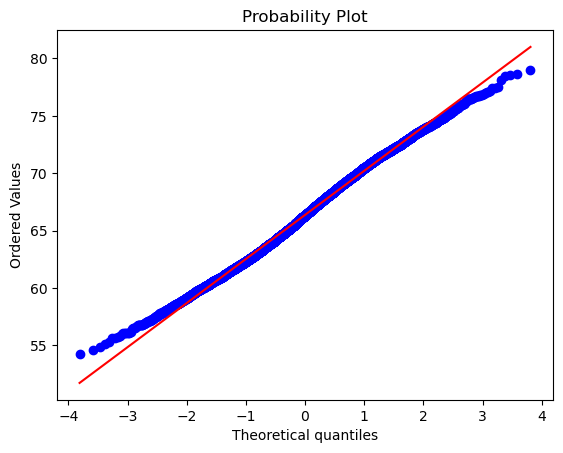

In [10]:
import scipy.stats as stats
import pylab
stats.probplot(dh, dist = 'norm', plot = pylab)
pylab.show()

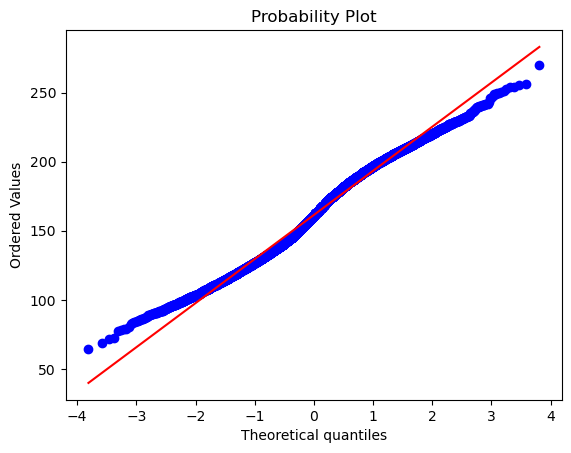

In [11]:
import scipy.stats as stats
import pylab
stats.probplot(dw, dist = 'norm', plot = pylab)
pylab.show()

По графикам видно, что данные распределены нормально

# Задание 1

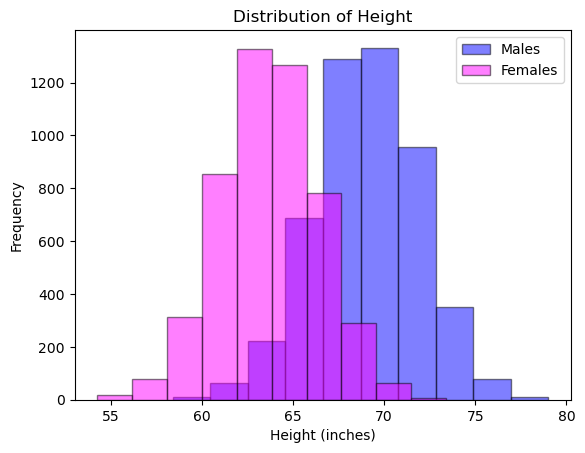

In [12]:
import matplotlib.pyplot as plt
data[data['Gender']=='Male'].Height.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5)
data[data['Gender']=='Female'].Height.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

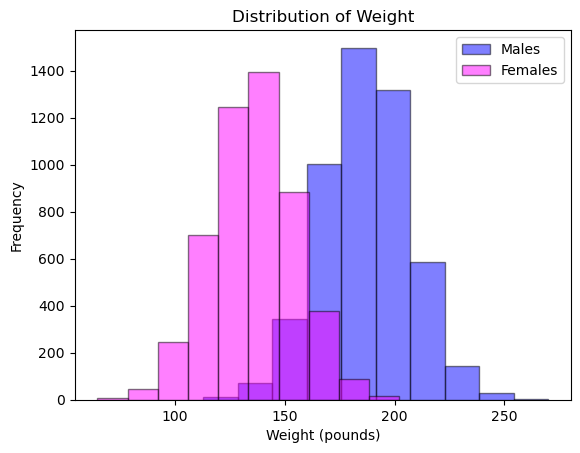

In [18]:
data[data['Gender']=='Male'].Weight.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5)
data[data['Gender']=='Female'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5)
plt.legend(labels=['Males','Females'])
plt.title('Distribution of Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

Ядерная оценка плотности:

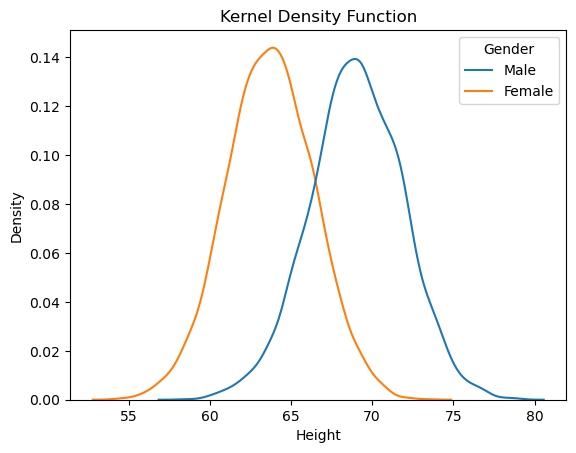

In [19]:
sns.kdeplot(x='Height', data=data, hue='Gender', common_norm=False)
plt.title("Kernel Density Function")
plt.show()

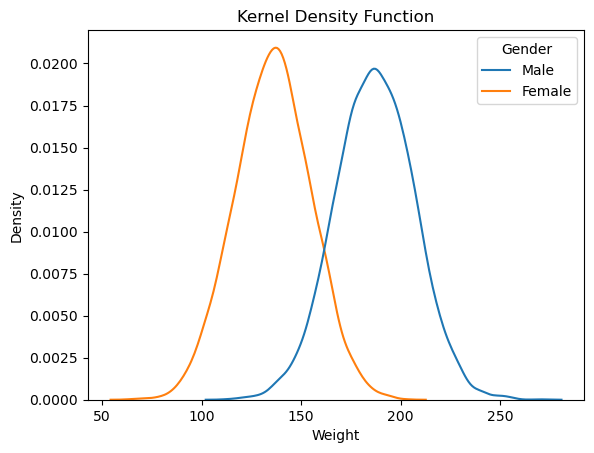

In [20]:
sns.kdeplot(x='Weight', data=data, hue='Gender', common_norm=False)
plt.title("Kernel Density Function")
plt.show()

Подтверждаем, что распределение является нормальным (что было выявлено ранее).
Более того, рост и вес мужчин в общем больше, чем у женщин, но при этом параметры роста и веса у мужчин распределены так же, как и у женщин

# Задание 2

Cdplot

In [13]:
df = pd.read_csv('/Users/renat/Desktop/TechPrac/FilmPreferences2123.csv')
df

sex   age  educat  income  thriller  horror  comedy  adventur  docu  \
0    0.0  25.0     2.0  2000.0       6.0     3.0     6.0       6.0   9.0   
1    0.0  33.0     2.0  2350.0       4.0     2.0     7.0       8.0   4.0   
2    0.0  44.0     3.0  4500.0       6.0     3.0     7.0       8.0   8.0   
3    0.0  53.0     3.0  5800.0       4.0     1.0     5.0       9.0   7.0   
4    0.0  64.0     2.0  4450.0       5.0     4.0     6.0       9.0   9.0   
..   ...   ...     ...     ...       ...     ...     ...       ...   ...   
145  0.0  18.0     1.0   380.0       7.0     6.0     7.0       7.0   8.0   
146  1.0  19.0     1.0   290.0       9.0    10.0     8.0       7.0   5.0   
147  1.0  20.0     2.0  1150.0      10.0     4.0     8.0       7.0   6.0   
148  1.0  21.0     2.0  1000.0       7.0     3.0     5.0       9.0   6.0   
149  1.0  27.0     3.0  3275.0       8.0     5.0     6.0       7.0   8.0   

     roman  munt  movies  tuschin  arena  
0      6.0   0.0     0.0      0.0    0.0  
1      7.0   0.0     0.0      0.0    1.0  
2      7.0   1.0     1.0      1.0    0.0  
3      4.0   1.0     1.0      1.0    0.0  
4      8.0   1.0     0.0      0.0    0.0  
..     ...   ...     ...      ...    ...  
145    8.0   0.0     1.0      1.0    0.0  
146    6.0   1.0     0.0      0.0    1.0  
147    8.0   1.0     0.0      1.0    0.0  
148    5.0   1.0     0.0      1.0    1.0  
149    7.0   0.0     1.0      1.0    0.0  

[150 rows x 14 columns]

In [14]:
df1 = df['income']
df2 = df['sex']

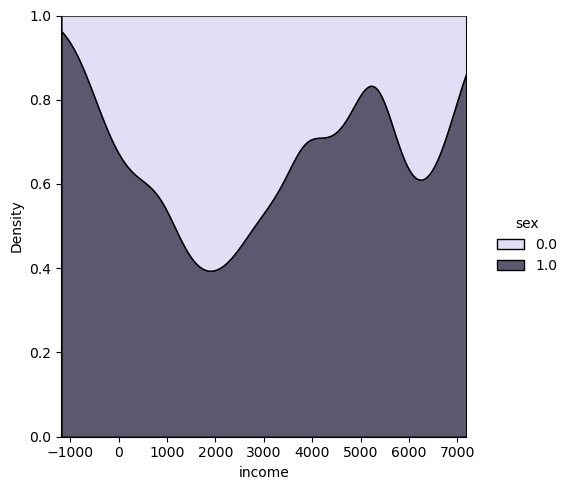

In [15]:
sns.displot(data = data, x = df1, hue = df2, multiple="fill", kind="kde", palette="ch:rot=-0,light=.85")

Dotchart:

In [16]:
sorted_df = df.sort_values(by='income')

In [17]:
import plotly.express as px
fig = px.scatter(sorted_df, y ="income", x = "age", height=1600)
fig.update_yaxes(type='category', tickvals=sorted_df['income'].tolist())
fig.show()

Boxplot:

In [26]:
df = pd.read_csv('/Users/renat/Desktop/StudentsPerformance.csv')
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

<AxesSubplot:xlabel='math score', ylabel='gender'>

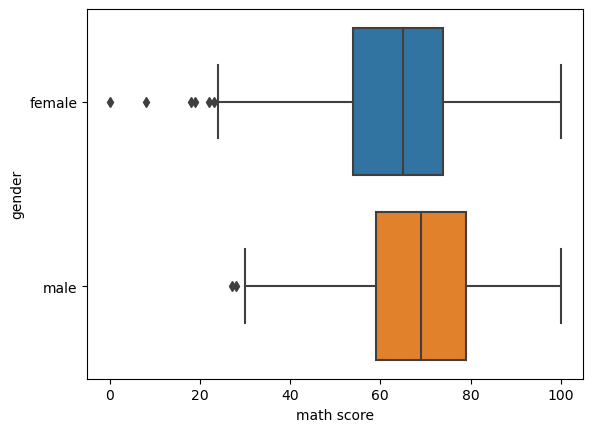

In [27]:
sns.boxplot(data = df, y = "gender", x = "math score")

<AxesSubplot:xlabel='reading score', ylabel='gender'>

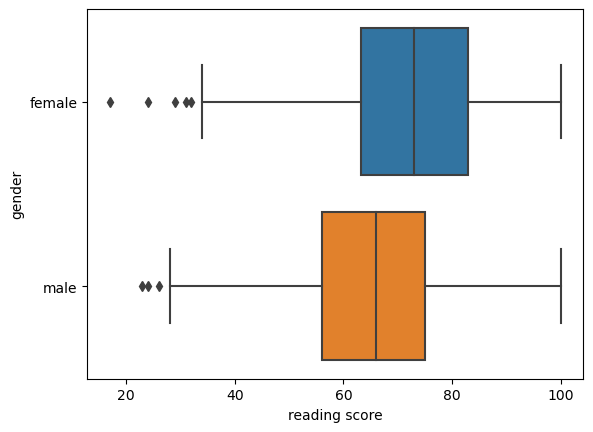

In [28]:
sns.boxplot(data = df, y = "gender", x = "reading score")

<AxesSubplot:xlabel='writing score', ylabel='gender'>

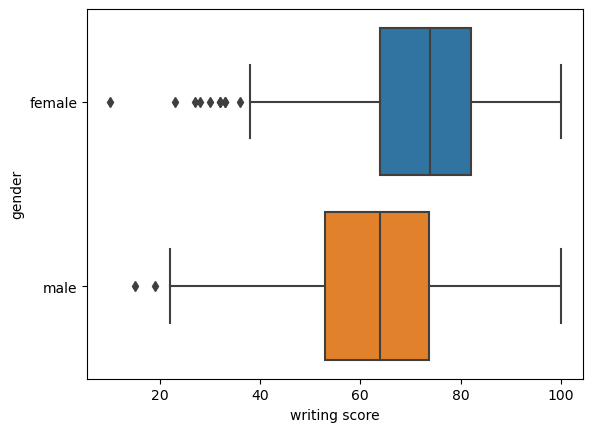

In [29]:
sns.boxplot(data = df, y = "gender", x = "writing score")

Stripchart:

<AxesSubplot:xlabel='math score', ylabel='gender'>

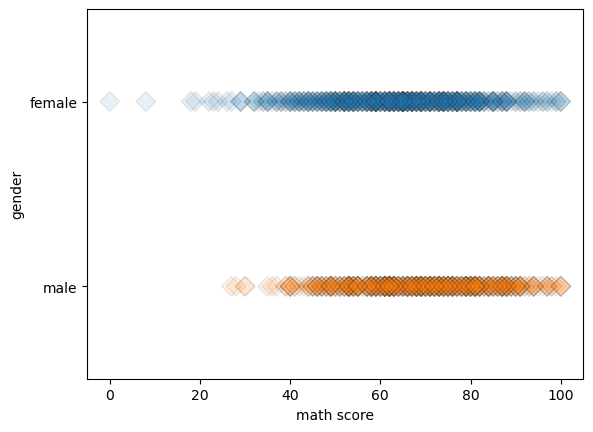

In [30]:
sns.stripplot(data=df, y = "gender", x = "math score", jitter=False, s=10, marker="D", linewidth=1, alpha=.1)

<AxesSubplot:xlabel='reading score', ylabel='gender'>

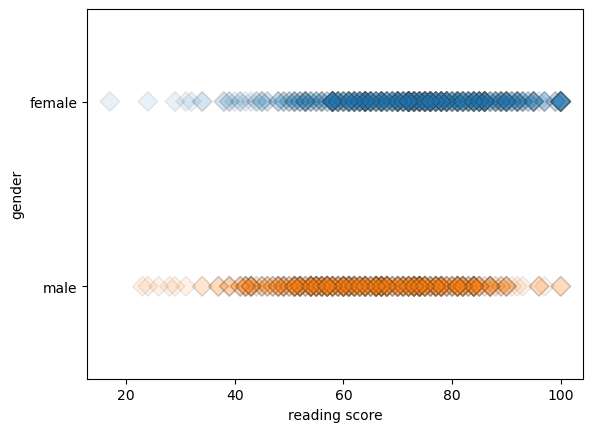

In [31]:
sns.stripplot(data=df, y = "gender", x = "reading score", jitter=False, s=10, marker="D", linewidth=1, alpha=.1)

<AxesSubplot:xlabel='writing score', ylabel='gender'>

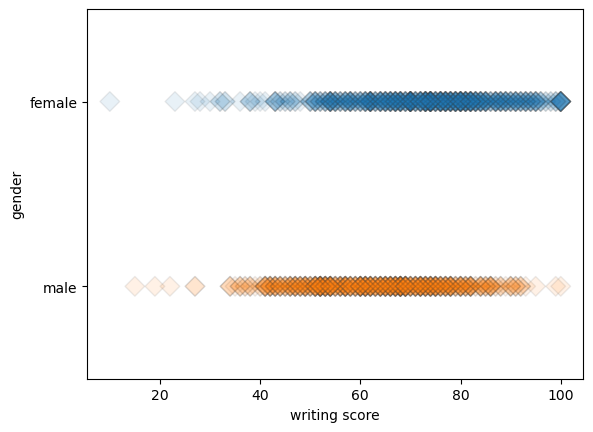

In [32]:
sns.stripplot(data=df, y = "gender", x = "writing score", jitter=False, s=10, marker="D", linewidth=1, alpha=.1)

Так как указанные в задании функции относятся к языку R, то были использованы аналогичные данным функции, имеющиеся в Python

# Задание 3

In [8]:
data = pd.read_csv('/Users/renat/Desktop/avocado.csv')
data

Index        Date  AveragePrice  Total Volume     4046       4225  \
0          0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1          1  2015-12-20          1.35      54876.98   674.28   44638.81   
2          2  2015-12-13          0.93     118220.22   794.70  109149.67   
3          3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4          4  2015-11-29          1.28      51039.60   941.48   43838.39   
...      ...         ...           ...           ...      ...        ...   
18244      7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245      8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246      9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247     10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248     11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [9]:
data1 = data[['Total Volume']]
data1

Total Volume
0          64236.62
1          54876.98
2         118220.22
3          78992.15
4          51039.60
...             ...
18244      17074.83
18245      13888.04
18246      13766.76
18247      16205.22
18248      17489.58

[18249 rows x 1 columns]

In [191]:
data1.describe()

Total Volume
count  1.824900e+04
mean   8.506440e+05
std    3.453545e+06
min    8.456000e+01
25%    1.083858e+04
50%    1.073768e+05
75%    4.329623e+05
max    6.250565e+07

<AxesSubplot:ylabel='Frequency'>

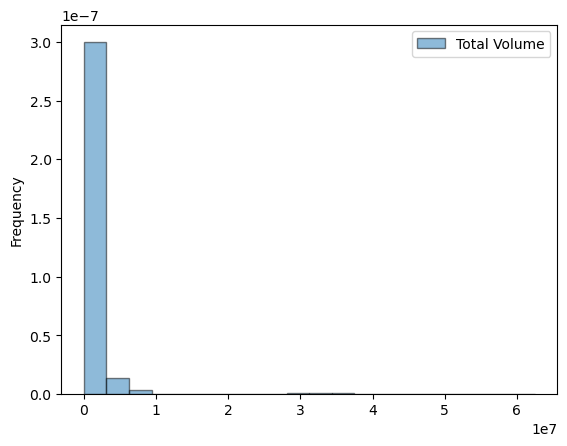

In [192]:
data1.plot(kind='hist', density=1, bins=20, stacked=False, edgecolor='black', alpha=.5)

Для параметра Total Volume построили частотный график

Применим двусторонний критерий Граббса для обнаружения выбросов на обоих концах набора данных:

In [193]:
data2 = data1.to_numpy()
print(data2.shape)

(18249, 1)


Видим, что в массиве 18249 элементов

In [10]:
data2 = data1.to_numpy()

In [ ]:
data3 = grubbs.test(data2, alpha=.05)

In [51]:
#data3 - массив с удаленными выбросами

<AxesSubplot: ylabel='Frequency'>

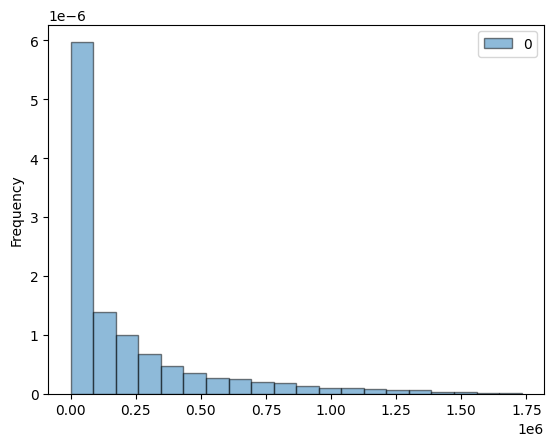

In [53]:
data4 = pd.DataFrame(data=data3)
data4.plot(kind='hist', density=1, bins=20, stacked=False, edgecolor='black', alpha=.5)

Односторонний тест Граббса для максимального и минимального значений:

<AxesSubplot: ylabel='Frequency'>

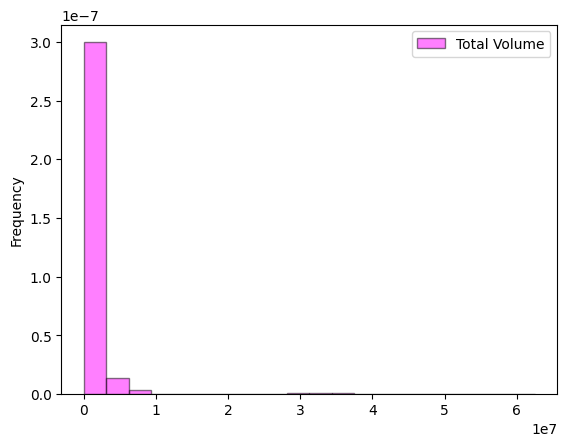

In [66]:
import numpy as np
from outliers import smirnov_grubbs as grubbs
data1.plot(kind='hist', density=1, bins=20, stacked=False, edgecolor='black', alpha=.5, color='magenta')

In [67]:
data2 = data1.to_numpy()
print(data2)
print(data2.shape)

[[ 64236.62]
 [ 54876.98]
 [118220.22]
 ...
 [ 13766.76]
 [ 16205.22]
 [ 17489.58]]
(18249, 1)


In [68]:
data3 = grubbs.min_test(data2, alpha=.05)
print(data3)
print(data3.shape)

[[ 64236.62]
 [ 54876.98]
 [118220.22]
 ...
 [ 13766.76]
 [ 16205.22]
 [ 17489.58]]
(18249, 1)


Тест минимального выброса не выявил минимальное значение как выброс. Кол-во элементов в массиве не изменилось

<AxesSubplot: ylabel='Frequency'>

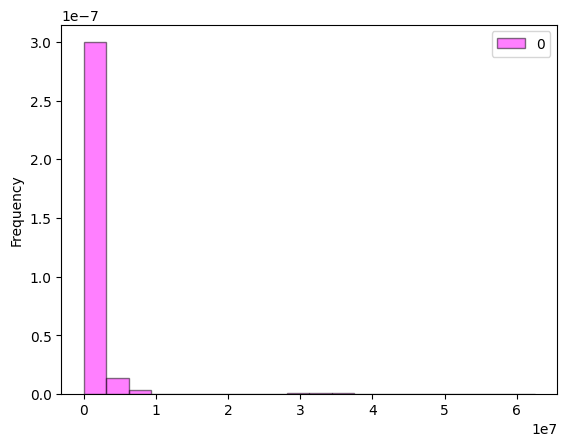

In [69]:
data4 = pd.DataFrame(data=data3)
data4.plot(kind='hist', density=1, bins=20, stacked=False, edgecolor='black', alpha=.5, color='magenta')

In [70]:
data3 = grubbs.max_test(data2, alpha=.05)
print(data3)
print(data3.shape)

[ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]
(16573,)


Видим, что кол-во элементов в массиве уменьшилось, так как все выбросы были удалены (они являлись максимальными значениями)

<AxesSubplot: ylabel='Frequency'>

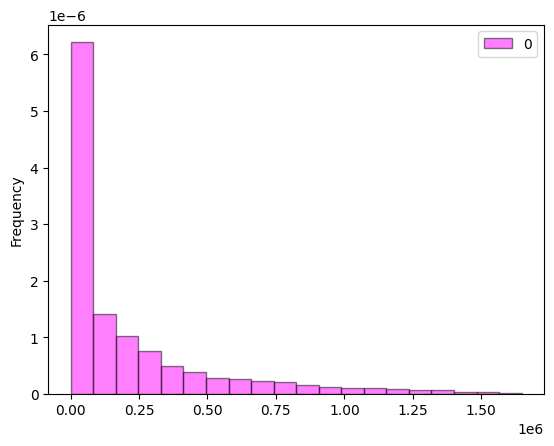

In [71]:
data4 = pd.DataFrame(data=data3)
data4.plot(kind='hist', density=1, bins=20, stacked=False, edgecolor='black', alpha=.5, color='magenta')

data3 - массив с удаленными выбросами. 
Видим, что кол-во элементов в массиве уменьшилось.

Теперь для параметра Total Volume частотный график имеет уже другой вид.
Из графика видно, что выбросы были удалены, так как значения выбросов - значения с минимальными частотами, точность шкалы увеличилась, график "приблизился". Тест Граббса двусторонний и отдельно тесты максимального и минимального значений привели к одним и тем же результатам, это видно из графиков и из кол-ва элементов в массиве после применения теста

Q-тест Диксона:

In [40]:
df = pd.read_csv('/Users/renat/Desktop/speed.csv')
df

generation  speed
0           1  28.28
1           3  29.10
2           2  30.95
3           1  31.49
4           2  32.49
5           3  32.79
6           3  32.79
7           3  31.99
8           2  31.99

Проверим распределение на нормальность:

In [42]:
shapiro(df['speed'])

ShapiroResult(statistic=0.8447313904762268, pvalue=0.06517773121595383)

In [13]:
q90 = [0.941, 0.765, 0.642, 0.56, 0.507, 0.468, 0.437,
       0.412, 0.392, 0.376, 0.361, 0.349, 0.338, 0.329,
       0.32, 0.313, 0.306, 0.3, 0.295, 0.29, 0.285, 0.281,
       0.277, 0.273, 0.269, 0.266, 0.263, 0.26
      ]

q95 = [0.97, 0.829, 0.71, 0.625, 0.568, 0.526, 0.493, 0.466,
       0.444, 0.426, 0.41, 0.396, 0.384, 0.374, 0.365, 0.356,
       0.349, 0.342, 0.337, 0.331, 0.326, 0.321, 0.317, 0.312,
       0.308, 0.305, 0.301, 0.29
      ]

q99 = [0.994, 0.926, 0.821, 0.74, 0.68, 0.634, 0.598, 0.568,
       0.542, 0.522, 0.503, 0.488, 0.475, 0.463, 0.452, 0.442,
       0.433, 0.425, 0.418, 0.411, 0.404, 0.399, 0.393, 0.388,
       0.384, 0.38, 0.376, 0.372
       ]

Построили простой набор для различных доверительных интервалов на основе табличных данных

In [14]:
Q90 = {n:q for n,q in zip(range(3,len(q90)+1), q90)}
Q95 = {n:q for n,q in zip(range(3,len(q95)+1), q95)}
Q99 = {n:q for n,q in zip(range(3,len(q99)+1), q99)}

In [15]:
def dixon_test(data, left=True, right=True, q_dict=Q95):

    assert(left or right) 
    assert(len(data) >= 3) 
    assert(len(data) <= max(q_dict.keys()))

    sdata = sorted(data)
    Q_mindiff, Q_maxdiff = (0,0), (0,0)

    if left:
        Q_min = (sdata[1] - sdata[0])
        try:
            Q_min /= (sdata[-1] - sdata[0])
        except ZeroDivisionError:
            pass
        Q_mindiff = (Q_min - q_dict[len(data)], sdata[0])

    if right:
        Q_max = abs((sdata[-2] - sdata[-1]))
        try:
            Q_max /= abs((sdata[0] - sdata[-1]))
        except ZeroDivisionError:
            pass
        Q_maxdiff = (Q_max - q_dict[len(data)], sdata[-1])

    if not Q_mindiff[0] > 0 and not Q_maxdiff[0] > 0:
        outliers = [None, None]

    elif Q_mindiff[0] == Q_maxdiff[0]:
        outliers = [Q_mindiff[1], Q_maxdiff[1]]

    elif Q_mindiff[0] > Q_maxdiff[0]:
        outliers = [Q_mindiff[1], None]

    else:
        outliers = [None, Q_maxdiff[1]]

    return outliers

In [52]:
dixon_test(df['speed'], left=True, right=True, q_dict=Q99)

[None, None]

# Задание 4

In [53]:
df = pd.read_csv('/Users/renat/Desktop/student_marks.csv')
df

Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05/04/1988     55       45       56.0       87       21   
1     Suresh      M    4/5/1987     75       55        NaN       64       90   
2     Ramesh      M   25/5/1989     25       54       89.0       76       95   
3    Jessica      F   12/8/1990     78       55       86.0       63       54   
4   Jennifer      F    2/9/1989     58       96       78.0       46       96   

   Economics  History  Civics  
0         52       89      65  
1         61       58       2  
2         87       56      74  
3         89       75      45  
4         77       83      53

In [54]:
df.isnull().sum()

Unnamed: 0    0
Gender        0
DOB           0
Maths         0
Physics       0
Chemistry     1
English       0
Biology       0
Economics     0
History       0
Civics        0
dtype: int64

Посчитали кол-во пропусков. Добавим еще пропуски.

In [55]:
import random
for i in range (1, 2, 1):
    df.at[random.randint(0,4), 'Maths'] = np.nan
    df.at[random.randint(0,4), 'Physics'] = np.nan
    df.at[random.randint(0,4), 'History'] = np.nan
df   

Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05/04/1988   55.0      NaN       56.0       87       21   
1     Suresh      M    4/5/1987   75.0     55.0        NaN       64       90   
2     Ramesh      M   25/5/1989    NaN     54.0       89.0       76       95   
3    Jessica      F   12/8/1990   78.0     55.0       86.0       63       54   
4   Jennifer      F    2/9/1989   58.0     96.0       78.0       46       96   

   Economics  History  Civics  
0         52     89.0      65  
1         61     58.0       2  
2         87      NaN      74  
3         89     75.0      45  
4         77     83.0      53

In [56]:
df.isnull().sum()

Unnamed: 0    0
Gender        0
DOB           0
Maths         1
Physics       1
Chemistry     1
English       0
Biology       0
Economics     0
History       1
Civics        0
dtype: int64

Замена пропусков средним значением по столбцу:

In [57]:
df.fillna(df.mean()) 
for i in df.columns[df.isnull().any(axis=0)]:
    df[i].fillna(df[i].mean(),inplace=True)
df 

/var/folders/7b/876s8n014yj7x0vr_9908tjr0000gn/T/ipykernel_82327/1802781059.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05/04/1988   55.0     65.0      56.00       87       21   
1     Suresh      M    4/5/1987   75.0     55.0      77.25       64       90   
2     Ramesh      M   25/5/1989   66.5     54.0      89.00       76       95   
3    Jessica      F   12/8/1990   78.0     55.0      86.00       63       54   
4   Jennifer      F    2/9/1989   58.0     96.0      78.00       46       96   

   Economics  History  Civics  
0         52    89.00      65  
1         61    58.00       2  
2         87    76.25      74  
3         89    75.00      45  
4         77    83.00      53

In [58]:
df1 = pd.read_csv('/Users/renat/Desktop/student_marks.csv')
df1

Unnamed: 0 Gender         DOB  Maths  Physics  Chemistry  English  Biology  \
0       John      M  05/04/1988     55       45       56.0       87       21   
1     Suresh      M    4/5/1987     75       55        NaN       64       90   
2     Ramesh      M   25/5/1989     25       54       89.0       76       95   
3    Jessica      F   12/8/1990     78       55       86.0       63       54   
4   Jennifer      F    2/9/1989     58       96       78.0       46       96   

   Economics  History  Civics  
0         52       89      65  
1         61       58       2  
2         87       56      74  
3         89       75      45  
4         77       83      53

Сравним с изначальной таблицей:

In [60]:
from sklearn.metrics import r2_score
true = df1['Maths']
pred = df['Maths']
print(r2_score(true, pred))
true = df1['Physics']
pred = df['Physics']
print(r2_score(true, pred))
true = df1['History']
pred = df['History']
print(r2_score(true, pred))

0.03612603537049486
0.7503121098626717
0.5290968075333028


Если 1, то идеально, близко к 1 - хорошо.

# Задание 5 

In [28]:
from scipy import stats
from scipy.stats import kstest, shapiro, anderson, cramervonmises, norm
from statsmodels.stats.diagnostic import lilliefors
import pylab
import matplotlib.pyplot as plt

Малый объем (n = 70), умеренный объем (n = 2000)

In [11]:
num = 70
mu = 0
sigma = 1

In [12]:
data = norm.rvs(size=num)

Нормальная непрерывная случайная величина

Анализ с помощью графиков эмпирических функций распределений:

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

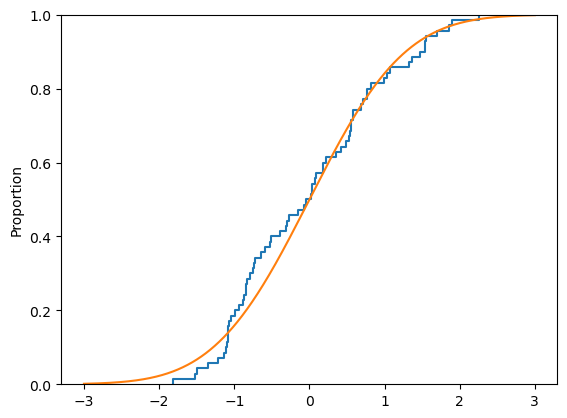

In [16]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data)
sns.lineplot(x,y)

In [17]:
num = 2000
mu = 0
sigma = 1

In [18]:
data1 = norm.rvs(size=num)

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

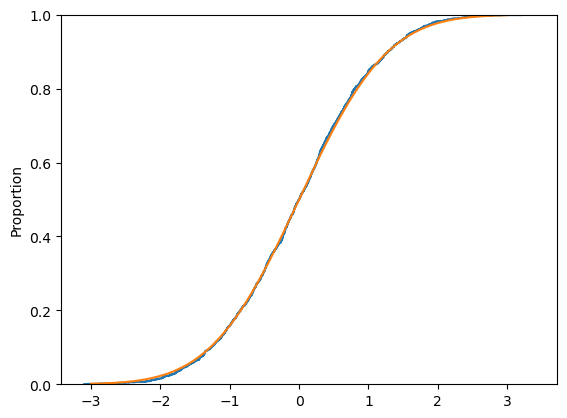

In [19]:
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data1)
sns.lineplot(x,y)

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

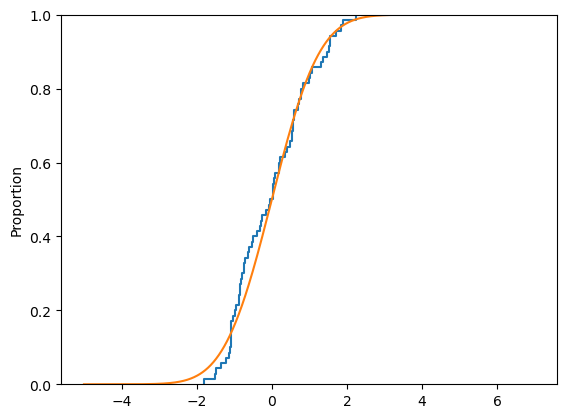

In [24]:
mu = 1
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data)
sns.lineplot(x,y)

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Proportion'>

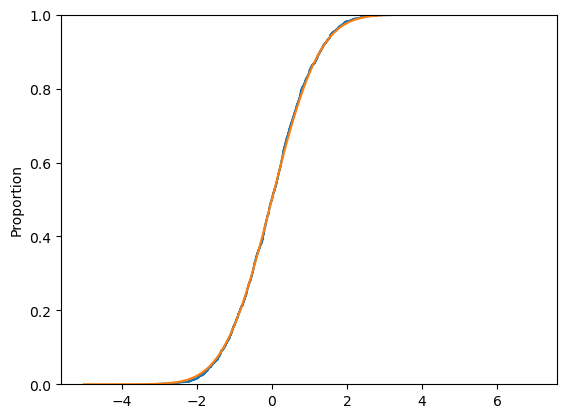

In [25]:
mu = 1
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data1)
sns.lineplot(x,y)

По графикам видно, что при большем объеме получаем более точный результат

Метод квантилей:

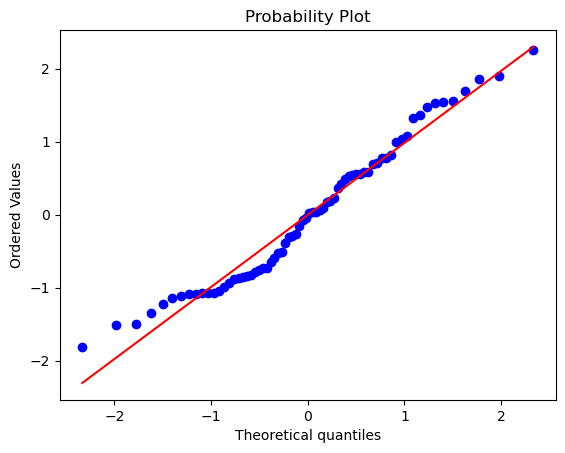

In [29]:
stats.probplot(data, dist="norm", plot=plt)
plt.show()

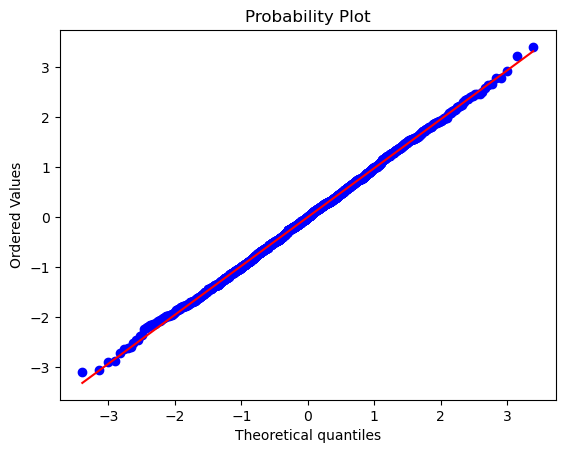

In [30]:
stats.probplot(data1, dist="norm", plot=plt)
plt.show()

Критерий Колмогорова-Смирнова:

In [31]:
kstest(data, stats.norm.cdf)

KstestResult(statistic=0.1089195986535475, pvalue=0.3517359895122654)

In [32]:
kstest(data1, stats.norm.cdf)

KstestResult(statistic=0.012948905282217649, pvalue=0.8862482469617982)

Критерий Шапиро-Уилка:

In [33]:
shapiro(data)

ShapiroResult(statistic=0.9638765454292297, pvalue=0.04113416746258736)

In [34]:
shapiro(data1)

ShapiroResult(statistic=0.9993425607681274, pvalue=0.7366245985031128)

Критерий Андерсона-Дарлинга:

In [35]:
anderson(data)

AndersonResult(statistic=0.8330359876835871, critical_values=array([0.548, 0.624, 0.748, 0.873, 1.038]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [36]:
anderson(data1)

AndersonResult(statistic=0.2787728276953203, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Критерий Крамера фон Мизеса:

In [37]:
cramervonmises(data, stats.norm.cdf)

CramerVonMisesResult(statistic=0.11973076114355512, pvalue=0.4975811964187449)

In [38]:
cramervonmises(data1, stats.norm.cdf)

CramerVonMisesResult(statistic=0.04657610477381758, pvalue=0.8967759453781105)

Колмогорова-Смирнова в модификации Лиллиефорса:

In [39]:
lilliefors(data)

(0.11153970860938373, 0.046131841416544465)

In [40]:
lilliefors(data1)

(0.010600472228681879, 0.8579502725539742)

Шапиро-Франсиа:

In [47]:
from sfrancia import shapiroFrancia

In [48]:
shapiroFrancia(data)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9691651165305093,
 'statistics z': 1.4317390029219403,
 'p-value': 0.07610926486579198}

In [49]:
shapiroFrancia(data1)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.999427404425294,
 'statistics z': -0.789767008852071,
 'p-value': 0.7851680752795037}

По всем тестам и критериям можно сдлеать вывод, что больший объем имеет большую точность, чем меньший, показывает более точный результат

# Задание 6

In [50]:
data = pd.read_csv('/Users/renat/Desktop/weight-height.csv')
data

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [52]:
dh = data['Height']
dh

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [62]:
df = pd.read_csv('/Users/renat/Desktop/speed.csv')
ds = df['speed']
ds

0    28.28
1    29.10
2    30.95
3    31.49
4    32.49
5    32.79
6    32.79
7    31.99
8    31.99
Name: speed, dtype: float64

dh - большой объем данных (n = 10000), ds - малый объем (n = 9)

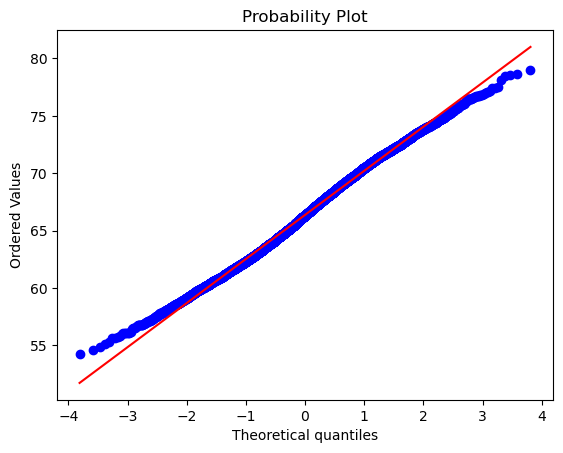

In [58]:
stats.probplot(dh, dist="norm", plot=plt)
plt.show()

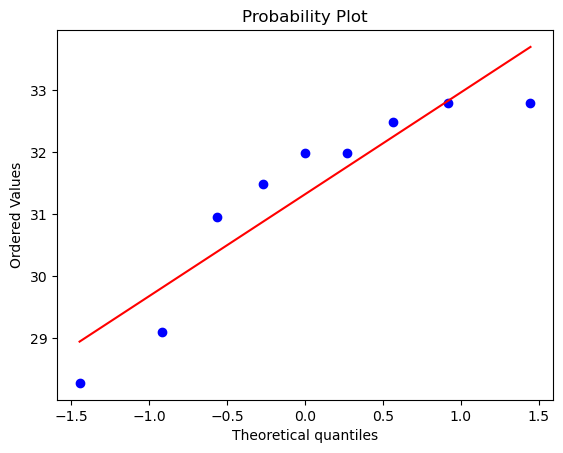

In [63]:
stats.probplot(ds, dist="norm", plot=plt)
plt.show()

Критерий Колмогорова-Смирнова:

In [64]:
kstest(dh, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [65]:
kstest(ds, stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

Критерий Шапиро-Уилка:

In [66]:
shapiro(dh)

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960617423057556, pvalue=8.136066448754815e-16)

In [67]:
shapiro(ds)

ShapiroResult(statistic=0.8447313904762268, pvalue=0.06517773121595383)

Критерий Андерсона-Дарлинга:

In [68]:
anderson(dh)

AndersonResult(statistic=12.000426461434472, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [69]:
anderson(ds)

AndersonResult(statistic=0.6100834336235934, critical_values=array([0.507, 0.578, 0.693, 0.808, 0.961]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Критерий Крамера фон Мизеса:

In [70]:
cramervonmises(dh, stats.norm.cdf)

CramerVonMisesResult(statistic=3333.3333333333335, pvalue=0)

In [71]:
cramervonmises(ds, stats.norm.cdf)

CramerVonMisesResult(statistic=2.9999999999999996, pvalue=0)

Колмогорова-Смирнова в модификации Лиллиефорса:

In [72]:
lilliefors(dh)

(0.025544360542168465, 0.0009999999999998899)

In [73]:
lilliefors(ds)

(0.2164727026816058, 0.2631957382678599)

Шапиро-Франсиа:

In [47]:
from sfrancia import shapiroFrancia

In [74]:
shapiroFrancia(dh)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9961339619357787,
 'statistics z': 8.112321270750694,
 'p-value': 2.483089371188228e-16}

In [75]:
shapiroFrancia(ds)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.8549119798386154,
 'statistics z': 1.4318013193443155,
 'p-value': 0.07610034479785872}

Чем больше объем данных, тем точнее результат получается. Можно заметить, что некоторые критерии/тесты отвергают нулевую гипотезу для маленького объема данных (ds), в то время как другие - нет. То есть разные критерии/тесты могут давать разный результат об одном и том же наборе данных. С большим объемом данных (dh) такого не было

# Задание 7

In [80]:
from scipy.stats import ttest_ind


In [81]:
alpha_1 = 0.1
alpha_2 = 0.05
alpha_3 = 0.01

Различные значения alpha для различных доверительных уровней (0.9, 0.95, 0.99)

In [99]:
data = pd.read_csv('/Users/renat/Desktop/weight-height.csv')
df = data.query('Gender == ["Female"]')
df = df['Weight']
df

5000    102.088326
5001    141.305823
5002    131.041403
5003    128.171511
5004    129.781407
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 5000, dtype: float64

In [100]:
dm = data.query('Gender == ["Male"]')
dm = dm['Weight']
dm

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
4995    177.131052
4996    159.285228
4997    199.195400
4998    185.905909
4999    198.903012
Name: Weight, Length: 5000, dtype: float64

In [101]:
df = df.to_numpy()
dm = dm.to_numpy()

In [102]:
print(np.var(df), np.var(dm))

361.7819105481181 391.21581520128166


Хотим проверить, имеют ли мужчины и женщины одинаковый средний рост

In [103]:
stats.ttest_ind(a=df, b=dm, equal_var=True)

Ttest_indResult(statistic=-131.8195276508186, pvalue=0.0)

p-value < alpha_1, alpha_2, alpha_3 => отклоняем нулевую гипотезу, выборки принадлежат разным распределениям

Односторонний вариант:

In [131]:
stats.ttest_ind(df, dm, alternative = 'greater')

Ttest_indResult(statistic=array([ 28.92755104,  28.26753352, -95.156256  ]), pvalue=array([8.34671791e-171, 9.86432904e-164, 1.00000000e+000]))

p-value < alpha_1, alpha_2, alpha_3 => отклоняем нулевую гипотезу, что среднее первой выборки меньше

In [109]:
df = pd.read_csv('/Users/renat/Desktop/diet.csv')
df

weight_before  weight_after  weight_change
0      264.189575    257.088376      -7.101199
1      229.557224    223.312002      -6.245222
2      257.273185    257.079858      -0.193327
3      198.977931    198.304714      -0.673217
4      272.594285    271.067271      -1.527014
..            ...           ...            ...
95     220.924705    218.672314      -2.252392
96     276.159044    272.867567      -3.291476
97     206.609217    208.173181       1.563964
98     233.905562    228.837503      -5.068059
99     255.937615    247.688132      -8.249484

[100 rows x 3 columns]

In [113]:
b = df['weight_before']
a = df['weight_after']

In [114]:
print(np.var(a), np.var(b ))

973.1105838842554 984.6111854479595


Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет меньше 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Двусторонний тест Стьюдента:

In [116]:
stats.ttest_ind(a=b, b=a, equal_var=True)

Ttest_indResult(statistic=0.3045304268623751, pvalue=0.76104365181021)

p-value = 0.76

0.76 > alpha_1, alpha_2, alpha_3 =>  две средние совокупности равны

Односторонний вариант:

In [126]:
stats.ttest_ind(a, b, alternative = 'less')

Ttest_indResult(statistic=-0.3045304268623751, pvalue=0.380521825905105)

p-value > alpha_1, alpha_2, alpha_3 => не отклоняем нулевую гипотезу о том, что среднее первой выборки больше

Определим объем выборки для достижения заданной мощности:

In [133]:
from statsmodels.stats.power import TTestIndPower
effect = 0.8
power = 0.8
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha_1)
result

20.03176537071408

20 - рекомендуемое минимальное количество образцов, необходимое для получения эффекта желаемого размера при alpha_1

In [134]:
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha_2)
result

25.52457250047935

25 - рекомендуемое минимальное количество образцов, необходимое для получения эффекта желаемого размера при alpha_2

In [135]:
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha_3)
result

38.188313204536215

38 - рекомендуемое минимальное количество образцов, необходимое для получения эффекта желаемого размера при alpha_3

Знаковый ранговый тест Уилкоксона-Манна-Уитни:

Проверим, изменился ли средний вес за время диеты

In [136]:
df = pd.read_csv('/Users/renat/Desktop/diet.csv')
df

weight_before  weight_after  weight_change
0      264.189575    257.088376      -7.101199
1      229.557224    223.312002      -6.245222
2      257.273185    257.079858      -0.193327
3      198.977931    198.304714      -0.673217
4      272.594285    271.067271      -1.527014
..            ...           ...            ...
95     220.924705    218.672314      -2.252392
96     276.159044    272.867567      -3.291476
97     206.609217    208.173181       1.563964
98     233.905562    228.837503      -5.068059
99     255.937615    247.688132      -8.249484

[100 rows x 3 columns]

In [137]:
b = df['weight_before']
a = df['weight_after']

In [138]:
stats.wilcoxon(b, a)

WilcoxonResult(statistic=1752.0, pvalue=0.007864669519931426)

p-value < alpha_1, alpha_2, alpha_3 => отвергаем нулевую гипотезу => средний вес за время диеты изменился

Проверка гипотез об однородности дисперсий:

Тест Фишера:

In [141]:
f = np.var(b, ddof=1)/np.var(a, ddof=1)
x = np.array(b)
y = np.array(a)
p_value = 1-stats.f.cdf(f, x.size-1, y.size-1)
p_value    

0.4767534599465424

p-value > alpha_1, alpha_2, alpha_3 => не отвергаем нулевую гипотезу (распределения одинаковые)

Тест Левене:

In [144]:
stats.levene(b, a, center = 'mean')

LeveneResult(statistic=0.014308154945704008, pvalue=0.9049080704300925)

p-value > alpha_1, alpha_2, alpha_3 => не отвергаем нулевую гипотезу (распределения одинаковые)

Тест Бартлетта:

In [147]:
stats.bartlett(b, a)

BartlettResult(statistic=0.003399335090174892, pvalue=0.9535066270714825)

p-value > alpha_1, alpha_2, alpha_3 => не отвергаем нулевую гипотезу (распределения одинаковые)

Тест Флигнера-Килина:

In [149]:
stats.fligner(b, a, center = 'mean')

FlignerResult(statistic=0.02170721558384374, pvalue=0.882868643531881)

p-value > alpha_1, alpha_2, alpha_3 => не отвергаем нулевую гипотезу (распределения одинаковые)

Все тесты показали, что распределения значений веса до и после диеты - одинаковые распределения, что подтверждает полученную информацию ранее о том, что оба набора являются нормальными распределениями

# Задание 8

In [18]:
# Коэффициент корреляции Пирсона измеряет линейную связь между переменными. Его значение можно интерпретировать так:

# +1 - Полная положительная корреляция
# +0,8 - Сильная положительная корреляция
# +0.6 - Умеренная положительная корреляция
# 0 - никакой корреляции
# -0.6 - Умеренная отрицательная корреляция
# -0,8 - Сильная отрицательная корреляция
# -1 - Полная отрицательная корреляция

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 

In [20]:
X = data['4046']
Y = data['4225']

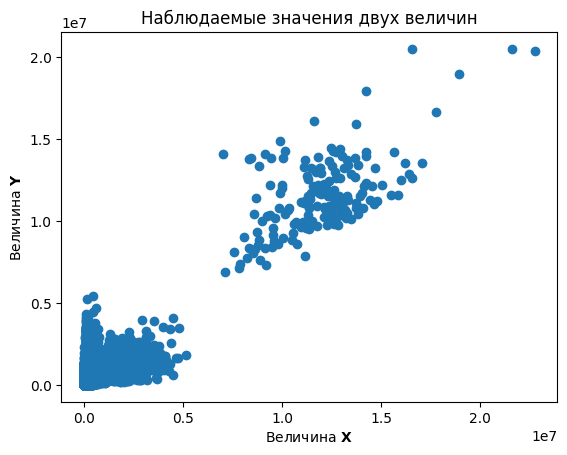

In [21]:
fig, ax = plt.subplots()

ax.scatter(X, Y)

ax.set_xlabel(r'Величина $\mathbf{X}$')
ax.set_ylabel(r'Величина $\mathbf{Y}$')

ax.set_title('Наблюдаемые значения двух величин')

plt.show()

In [22]:
#вычисление коэффициента корреляции
VAL = np.vstack((X, Y))
R_xy = np.corrcoef(VAL)
R_xy

array([[1.        , 0.92610996],
       [0.92610996, 1.        ]])

In [23]:
#значение коэффициента близко к 1 => данные величины сильно коррелируют, 
#коэффициент положителен => обе величины возрастают

In [24]:
#корреляция Спирмена
# -1 : идеальная отрицательная связь между двумя переменными
# 0: нет связи между двумя переменными
# 1: идеальная положительная связь между двумя переменными

In [25]:
from scipy.stats import spearmanr
coef, p = spearmanr(data['4046'], data['4225'])
print(coef) #ранговая корреляция Спирмена
print(p) #p-значение

0.7939391911434058
0.0


In [26]:
#ранговая корреляция больше 0, близка к 1 => близка к идеальной положительной связи
#р-значение меньше 0.05 => корреляция статистически значимая (отвергаем нулевую гипотезу о том, что выборки некоррелируемы)

In [27]:
#коэффициент Кендалла

In [28]:
from scipy.stats import kendalltau
coef, p = kendalltau(data['4046'], data['4225'])
print(coef) #ранговая корреляция Спирмена
print(p) #p-значение

0.5927205849040433
0.0


In [29]:
#коррелируют, нулевую гипотезу отвергаем

# Задание 9

Метод хи-квадрат 

гипотеза H0 - наборы независимы

In [150]:
df = pd.read_csv('/Users/renat/Desktop/StudentsPerformance.csv')
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

In [151]:
contigency = pd.crosstab(df['gender'], df['test preparation course'])
contigency

test preparation course  completed  none
gender                                  
female                         184   334
male                           174   308

In [153]:
contigency_pct = pd.crosstab(df['gender'], df['test preparation course'], normalize='index')
contigency_pct

test preparation course  completed      none
gender                                      
female                    0.355212  0.644788
male                      0.360996  0.639004

Получили процентное соотношение по полу

In [154]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
p

0.9008273880804724

p > 0.05 => не можем отклонить нулевую гипотезу о независимости

Точный тест Фишера:

In [155]:
contigency = pd.crosstab(df['gender'], df['lunch'])
contigency

lunch   free/reduced  standard
gender                        
female           189       329
male             166       316

In [156]:
import scipy.stats as stats
print(stats.fisher_exact(contigency))

(1.0935657523711868, 0.5090345270156171)


p > 0.05 => не можем отклонить нулевую гипотезу => 
нет достаточных доказательств, чтобы сказать, что существует значительная связь

Тест Макнемара:

Выясним, влияет ли пол студента на его посещение подготовительных курсов

In [157]:
contigency = pd.crosstab(df['gender'], df['test preparation course'])
contigency

test preparation course  completed  none
gender                                  
female                         184   334
male                           174   308

In [158]:
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(np.array(contigency), exact=False)) #без поправки на непрерывность
print(mcnemar(np.array(contigency), exact=False, correction=False)) #с поправкой на непрерывность


pvalue      1.7324207227695077e-12
statistic   49.76574803149607
pvalue      1.2579736498368473e-12
statistic   50.39370078740158


Отвергаем H0, так как во обоих случаях p < 0.05 => пол влияет на посещение курсов

CMH тест:

In [159]:
from cmh import CMH
import pandas as pd

In [160]:
df = pd.read_csv('/Users/renat/Desktop/survey.csv')
df

gender    A    B
0     male   no  yes
1     male  yes  yes
2     male  yes  yes
3     male  yes  yes
4     male  yes  yes
5     male   no  yes
6     male  yes  yes
7     male   no   no
8   female  yes  yes
9   female  yes  yes
10  female  yes  yes
11  female   no   no
12  female   no   no
13  female  yes  yes
14  female   no  yes
15  female  yes  yes
16  female  yes  yes
17  female   no   no

In [161]:
result = CMH(df, 'A', 'B', stratifier='gender')
result

Cochran-Mantel-Haenszel Chi2 test

"A" x "B", stratified by "gender"

Cochran-Mantel-Haenszel M^2 = 7.40283, dof = 1, p-value = 0.0065

p-value < 0.05 => отвергаем нулевую гипотезу о том что между этими признаками нет связи

# Задание 10

In [163]:
df = pd.read_csv('/Users/renat/Desktop/FilmPreferences2123.csv')
data = df[['horror', 'comedy', 'docu', 'roman']]
data.head()

horror  comedy  docu  roman
0     3.0     6.0   9.0    6.0
1     2.0     7.0   4.0    7.0
2     3.0     7.0   8.0    7.0
3     1.0     5.0   7.0    4.0
4     4.0     6.0   9.0    8.0

Корреляционная матрица:

In [164]:
data.corr()

horror    comedy      docu     roman
horror  1.000000  0.069692 -0.037414 -0.372457
comedy  0.069692  1.000000 -0.307144  0.204275
docu   -0.037414 -0.307144  1.000000 -0.036550
roman  -0.372457  0.204275 -0.036550  1.000000

In [165]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

Коэффициент корреляции:

-1 указывает на совершенно отрицательную линейную корреляцию

0 указывает на отсутствие линейной корреляции

1 указывает на абсолютно положительную линейную корреляцию

Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными.

Фактор инфляции дисперсии:

In [166]:
df = pd.read_csv('/Users/renat/Desktop/FilmPreferences2123.csv')
df = df[['age', 'thriller', 'horror', 'comedy', 'adventur', 'docu', 'roman', 'munt']]
df.head()

age  thriller  horror  comedy  adventur  docu  roman  munt
0  25.0       6.0     3.0     6.0       6.0   9.0    6.0   0.0
1  33.0       4.0     2.0     7.0       8.0   4.0    7.0   0.0
2  44.0       6.0     3.0     7.0       8.0   8.0    7.0   1.0
3  53.0       4.0     1.0     5.0       9.0   7.0    4.0   1.0
4  64.0       5.0     4.0     6.0       9.0   9.0    8.0   1.0

Подберем модель множественной линейной регрессии, используя возраст в качестве переменной отклика 
и типы фильмов в качестве независимых переменных

In [167]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [168]:
y, X = dmatrices('age ~ thriller+horror+comedy+adventur+docu+roman+munt', data=df, return_type='dataframe')
#считаем для каждой переменной
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif


VIF   variable
0  150.652626  Intercept
1    1.954779   thriller
2    1.764257     horror
3    1.196507     comedy
4    1.210824   adventur
5    1.163652       docu
6    1.471254      roman
7    1.056583       munt

Все значения в диапазоне 1-5 => 
умеренная корреляция между объясняющей переменной и другими независимыми переменными в модели
при 1 - отсутствие корреляции (параметр 'munt' близок к этому)

# Задание 11

In [169]:
df = pd.read_csv('/Users/renat/Desktop/StudentsPerformance.csv')
df = pd.crosstab(df['math score'], df['race/ethnicity'])
df

race/ethnicity  group A  group B  group C  group D  group E
math score                                                 
0                     0        0        1        0        0
8                     0        1        0        0        0
18                    0        1        0        0        0
19                    0        1        0        0        0
22                    0        0        1        0        0
...                 ...      ...      ...      ...      ...
96                    0        0        3        0        0
97                    1        1        1        1        2
98                    0        0        2        1        0
99                    0        0        0        0        3
100                   1        0        0        1        5

[81 rows x 5 columns]

In [173]:
df_melt = pd.melt(df.reset_index(), id_vars=['math score'], value_vars=['group A', 'group B', 'group C', 'group D'])
df_melt

math score race/ethnicity  value
0             0        group A      0
1             8        group A      0
2            18        group A      0
3            19        group A      0
4            22        group A      0
..          ...            ...    ...
319          96        group D      0
320          97        group D      1
321          98        group D      1
322          99        group D      0
323         100        group D      1

[324 rows x 3 columns]

/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/renat/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


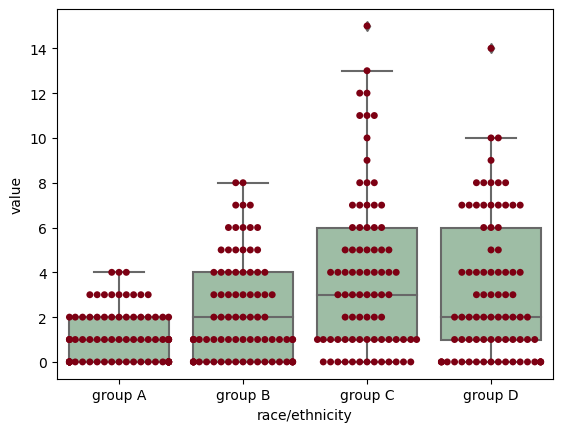

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='race/ethnicity', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x='race/ethnicity', y='value', data=df_melt, color='#7d0013')
plt.show()

In [175]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['group A'], df['group B'], df['group C'], df['group D'])
print(fvalue, pvalue)


16.442212314535414 5.823205960636818e-10


p < 0.05 => различия (H0 была о зависимости)

# Задание 12

In [176]:
df = pd.read_csv('/Users/renat/Desktop/student_scores.csv')
df.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [177]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

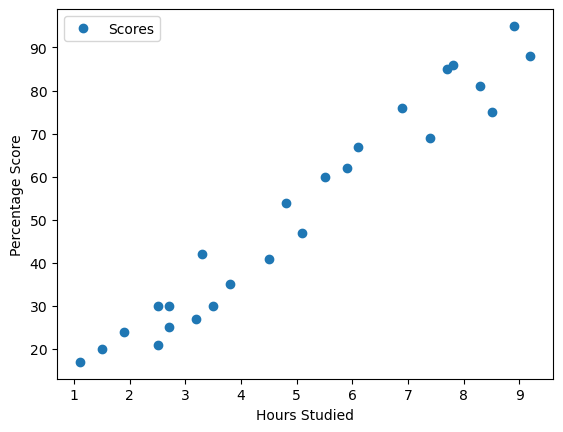

In [179]:
df.plot(x='Hours', y='Scores', style='o') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()


In [180]:
X = df.iloc[:, :-1].values #атрибуты
y = df.iloc[:, 1].values #метки

In [181]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# 80% данных - на обучающий набор, 20% - на набор тестов


In [182]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [183]:
print(regressor.intercept_)
print(regressor.coef_)#коэффициент наклона

2.018160041434662
[9.91065648]


Значит, студент, учившийся на 1 час больше, может рассчитывать примерно на 9.9% баллов больше

In [184]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033

Видим, что прогнозируемые проценты близки к фактическим

Проведем оценку:

In [186]:
from sklearn import metrics 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) #средняя абсолютная ошибка
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) #среднее значение квадратов ошибок
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #среднеквадратичная ошибка

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


In [187]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Среднее значение процентов всех студентов - 51.48

RMSE составляет менее 10%

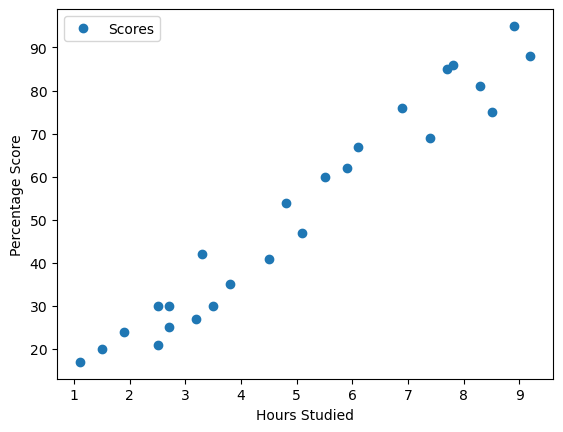

In [188]:
df.plot(x='Hours', y='Scores', style='o') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()